[View in Colaboratory](https://colab.research.google.com/github/SubmitCode/fifa_prediction/blob/master/fifa_prediction_part01.ipynb)

# Part 1: Explorative Dataanalysis










## Intro
Ix und Px haben ja eine Tippgruppe bei https://fifawmtippspiel.srf.ch . Persönlich bin ich ja nicht der grösste Fussballfan und folglich auch wenig Ahnung. Deshalb dachte ich mir versuchen wir es doch mal mittels Data Science ein Prediction zu erstellen. Zudem ist es eine gute Gelegenheit das Verständnis für Data Science und auch die "Lust" auf Data Science bei Inventx zu schüren :-) Natürlich wäre es auch super wenn unser Tippgruppe die beste wäre.

.. und unter uns gesagt ist das Ganze nicht selbstlos. Es hilft auch mir mein Wissen zu erweitern und aufzufrischen.

Wenn ihr noch mehr Daten habt oder gute Webseiten kennt, welche man mit Webscrapern abgrasen kann. Lasst es mich wissen und wir besorgen uns die Date. Als frei nach dem Motto "let's get our hands dirty" - lasst uns starten. 

Ich werde die gesamte Analyse in jupyter Notebooks machen. Diese sind so strukturiert, dass jeder selbst rumbasteln kann, ohne das er Angst haben muss etwas zu zerstören. 


## Generelle Infos
Geplant ist, im ersten Teil vor allem auf die Daten selbst einzugehen. Im zweiten Teil werden wir dann versuchen, mittels Machine Learning festzustellen wer gewinnen wird.  Gerne sind alle eingeladen selbst zu testen und rum zu probieren. 

Vielleicht sind manchen Dinge nicht ganz verständlich. Bei Fragen könnt ihr einfach auf mich zukommen oder einen Post auf Github hinterlassen.
https://github.com/SubmitCode/fifa_prediction

## Setup
Wenn ihr dies liest seit ihr im Colab-Portal von Google. Dies ist Googles Interpretation von Jupyter Notebooks. Es hilft übers Web einfach mit anderen zusammen zu arbeiten und ist zudem Gratis und das beste ist, Google stellt gratis GPU's zu Verfügung um auch komplexere ML (Machine Learning) - Modelle zu testen. [Mehr](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) über Colab Notebooks findet ihr hier.

## Datenquellen
Zu allererst brauchen wir mal Daten. Hier bin ich auf www.kaggle.com fündig gewerden. Insgesamt werden wir mit 3 Datasets starten.
- __FIFA Soccer Rankings__ Infos über die Rankingmehthode findet ihr [hier](https://en.wikipedia.org/wiki/FIFA_World_Rankings). Diese Daten wurden von der [Tadhg Fitzgerald](https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now) extrahiert. 
- __FIFA World Cup__ [Andre Becklas](https://www.kaggle.com/abecklas/fifa-world-cup/data) hat folgende 3 Dateien bereitgestellt
  - WorldCupMatches.csv alle WM Matches seit 1930
  - WorldCupPlayers.csv alle WM Spieler 
  - WorldCups.csv. Zusammenfassung aller Fussball WM's
- __International football results from 1872 to 2018__ [Mart Jürisoo
](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/data) hat die Daten freundlicherweise zu Verfügung gestellt. 
  - results.csv
- __FIFA worldcup 2018 Dataset__ enthält alle Matches der ersten Gruppenspiele. Bereitgestellt wurde das Dataset von [Nuggs](https://www.kaggle.com/ahmedelnaggar/fifa-worldcup-2018-dataset)
  - World Cup 2018 Dataset.csv
- __FIFA 18 Complete Player dataset__ Das sind mal richtig coole Daten. Hier finden wir Daten von allen Spielern der Fifa für das Jahr 2018. Bereit gestellt von [Aman Shrivastava](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/data). Dabei hat jeder Spieler über 70 Attribute. Angefangen über Gewicht, Salär bis hin zu "Aggression", "Preferred Position" etc.
  - CompleteDataset.csv
  - PlayerAttributeData.csv
  - PlayerPersonalData.csv
  - PlayerPlayingPositionData.csv


# Data Description

In diesem Abschnitt will ich euch die ersten Datasets vorstellen. Laut Wikipedia werden folgende wesentlichen Faktoren bei den Ranking berücksichtigt:


*   Match Result - hier kann man bis zu 3 Punkte erreichen 
*   Match Status - hierbei geht es darum ob es ein Freundschaftsspiel ist oder z.B. ein Meisterschaftsspiel
*   Opposition strength - Formel: (200 - ranking position) / 100
*   Regional strength - hierbei gibt es verschiedene Gruppen. Dies ist insofern wichtig da vielleich in Asien der Fussball nicht so stark vertreten ist wie z.B. in Südamerika.



In [0]:
# import von den libraries die wir für die Berechnungen und Visualisierungen 
# benötigen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path


In [2]:
'''
Downlaod the data from my Github page
'''

link_src = "https://github.com/SubmitCode/fifa_prediction/raw/master/data/"

# rankings
linkSoccerRankings = "FIFASoccerRankings/fifa_ranking.csv" 
data_ranking = pd.read_csv(os.path.join(link_src,linkSoccerRankings))


# fifa world cups
linkWorldCupMatches = "fifaWorldCup/WorldCupMatches.csv" 
data_WorldCupMatches = pd.read_csv(os.path.join(link_src,linkWorldCupMatches))

linkWorldCupPlayers = "fifaWorldCup/WorldCupPlayers.csv" 
data_WorldCupPlayers = pd.read_csv(os.path.join(link_src,linkWorldCupPlayers))

linkWorldCups = "fifaWorldCup/WorldCups.csv" 
data_WorldCups = pd.read_csv(os.path.join(link_src,linkWorldCups))


# international football results
linkinterantionalFootballResults = "internationalFootballResults/interantionalFootballResults.csv" 
data_interantionalFootballResults = pd.read_csv(os.path.join(link_src,linkinterantionalFootballResults))


# fifa world cup 2018
linkWorldCup2018 = "fifaWorldCup2018/WorldCup2018.csv" 
data_WorldCup2018 = pd.read_csv(os.path.join(link_src,linkWorldCup2018))


# player datasets
linkPlayerCompleteDataset = "completePlayerDataset/CompleteDataset.csv" 
data_PlayerCompleteDataset = pd.read_csv(os.path.join(link_src,linkPlayerCompleteDataset))

linkPlayerAttribute = "completePlayerDataset/PlayerAttributeData.csv" 
data_PlayerAttribute = pd.read_csv(os.path.join(link_src,linkPlayerAttribute))

linkPlayerPersonal = "completePlayerDataset/PlayerPersonalData.csv" 
data_PlayerPersonal = pd.read_csv(os.path.join(link_src,linkPlayerPersonal))

linkPlayerPlayingPosition = "completePlayerDataset/PlayerPlayingPositionData.csv" 
data_PlayerPlayingPosition = pd.read_csv(os.path.join(link_src,linkPlayerPlayingPosition))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Fifa Rankings


In [3]:
data_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
print("data frame general infos:")
print(data_ranking.info())

data frame general infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB
None


In [5]:
data_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [6]:
print("das frühste rank_date ist {}".format(data_ranking.rank_date.min()))
print("das letzte rank_date ist {}".format(data_ranking.rank_date.max()))
conditions = (data_ranking.rank_date == data_ranking.rank_date.max()) 
latestRank = data_ranking[conditions].sort_values('rank')

print("der aktuelle Ranglistenführer ist {}".format(latestRank.country_full.iloc[0]))
print("die Schweiz ist derzeit auf Rang {}!".format(latestRank.loc[latestRank.country_full == 'Switzerland', 'rank'].to_string(index=False, header=False)))



das frühste rank_date ist 1993-08-08
das letzte rank_date ist 2018-06-07
der aktuelle Ranglistenführer ist Germany
die Schweiz ist derzeit auf Rang 6!


Insgesamt hat die Tabelle __57 793__ Zeilen und __16__ Spalten. Im Wesentlichen gibt es nur wenige wichtige Spalten. Die anderen wurden davon abgeleitet.
- rank
- total_points
- country

Im Data Science Bereich ist es oft so, dass versucht wird mit der einfachsten Annahmen anzufange. Deshalb wäre eine gute Schätzung, wenn wir die Ränge hernehmen und dadurch die Gruppensieger bestimmen. Deshalb schauen uns wir am besten mal an wie sich die Gruppe E (die Gruppe von der Schweiz)entwickelt hat.

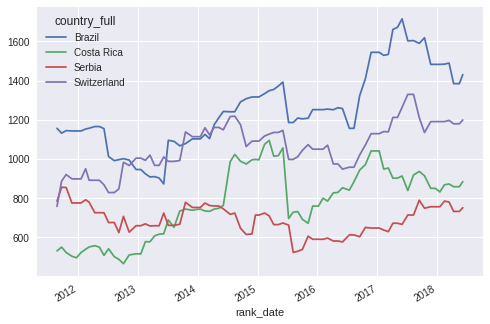

In [7]:
# gruppen
groupE = ["Brazil", "Switzerland", "Costa Rica", "Serbia"]

# convert string to date
data_ranking.rank_date = pd.to_datetime(data_ranking.rank_date)


t_data = data_ranking.loc[data_ranking.country_full.isin(groupE), ['rank_date', 'total_points', 'country_full']]
points_groupE = pd.pivot_table(t_data, columns='country_full', values='total_points', index='rank_date', aggfunc=np.sum)
points_groupE = points_groupE.dropna() # drop all N/As 
points_groupE = points_groupE[(points_groupE.Brazil != 0)] # remove entries with 0
points_groupE.plot()





## International football results from 1872 to 2018


In [9]:
data_interantionalFootballResults.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [40]:
print("insgesamt sind in dieser Tabelle {} Spiele vermerkt."\
      .format(data_interantionalFootballResults[["home_team"]]\
      .count()\
      .to_string(index=False, header=False)))

print("von den gesamt Spielen ist ein grossteil Friendly Tournaments")
#print("folgende Spielarten gibt es {}"\
#     .format(data_interantionalFootballResults.tournament.unique()))


data_interantionalFootballResults.groupby(by='tournament')\
      .count()\
      .sort_values("date", ascending=False)






insgesamt sind in dieser Tabelle 39045 Spiele vermerkt.
von den gesamt Spielen ist ein grossteil Friendly Tournaments


,date,home_team,away_team,home_score,away_score,city,country,neutral
tournament,,,,,,,,
Friendly,16476,16476,16476,16476,16476,16476,16476,16476
FIFA World Cup qualification,7100,7100,7100,7100,7100,7100,7100,7100
UEFA Euro qualification,2332,2332,2332,2332,2332,2332,2332,2332
African Cup of Nations qualification,1558,1558,1558,1558,1558,1558,1558,1558
FIFA World Cup,836,836,836,836,836,836,836,836
Copa América,787,787,787,787,787,787,787,787
AFC Asian Cup qualification,724,724,724,724,724,724,724,724
African Cup of Nations,638,638,638,638,638,638,638,638
CECAFA Cup,620,620,620,620,620,620,620,620


In [23]:
data_interantionalFootballResults.describe()

,home_score,away_score
count,39045.000000,39045.000000
mean,1.739890,1.179793
std,1.730455,1.378612
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## FIFA worldcup 2018 Dataset


In diesem Dataset sieht man welche Manschaften gegeneinander antreteten. 


In [41]:
data_WorldCup2018.tail()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
28,Poland,H,7.0,0.0,0.0,2.0,7.0,Senegal,15.0,NaN,NaN,Columbia,31.0,NaN,NaN,Japan,47.0,2.0,3.0,NaN
29,Senegal,H,1.0,0.0,0.0,0.0,23.0,Poland,15.0,NaN,NaN,Japan,32.0,2.0,3.0,Columbia,48.0,0.0,0.0,NaN
30,Columbia,H,5.0,0.0,0.0,0.0,13.0,Japan,16.0,2.0,2.0,Poland,31.0,NaN,NaN,Senegal,48.0,0.0,0.0,NaN
31,Japan,H,5.0,0.0,0.0,0.0,55.0,Columbia,16.0,-2.0,-2.0,Senegal,32.0,-2.0,-3.0,Poland,47.0,-2.0,-3.0,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In diesem Dataset sind die ersten Matches der WM festgehalten. 

## FIFA 18 Complete Player dataset 

Dieses Dataset werden wir später genauer untersuchen.

# Zusammenfassung
Im diesem Notebook ging es darum erstmals die Daten zu Sichten und anzuschauen. Im nächsten Schritt werden wir dann ein ML Problem definieren und versuchen die Siegerteams zu identifizieren.